
# Predict car purchasing dollar amount using ANNs (Regression task)



## PROJECT DESCRIPTION

In this small project, we will develop a model to predict the **total dollar amount** (or car purchase amount) that customers are willing to pay for a car given the following attributes (our inputs):
- Customer Name
- Customer e-mail
- Country
- Gender
- Age
- Annual Salary 
- Credit Card Debt 
- Net Worth 

## GETTING STARTED

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import our dataset
car_df = pd.read_csv('Car_Purchasing_Data.csv', encoding='ISO-8859-1')

In [3]:
# car_df

In [ ]:
# Visualize our dataset
sns.pairplot(car_df)

## DATA CLEANING

In [ ]:
# We will drop the columns that might not be very useful to train our model
# Country might be valuable, but we will drop it for the sake of simplicity
X = car_df.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis = 1)

In [6]:
X

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671
...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016
496,1,37.642000,56039.49793,12301.456790,360419.0988
497,1,53.943497,68888.77805,10611.606860,764531.3203
498,1,59.160509,49811.99062,14013.034510,337826.6382


In [7]:
y = car_df['Car Purchase Amount']

In [8]:
# X.shape

In [9]:
# y.shape

In [10]:
# Normalize our data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# Normalize our input data
X_scaled = scaler.fit_transform(X)

In [11]:
X_scaled

array([[0.        , 0.4370344 , 0.53515116, 0.57836085, 0.22342985],
       [0.        , 0.41741247, 0.58308616, 0.476028  , 0.52140195],
       [1.        , 0.46305795, 0.42248189, 0.55579674, 0.63108896],
       ...,
       [1.        , 0.67886994, 0.61110973, 0.52822145, 0.75972584],
       [1.        , 0.78321017, 0.37264988, 0.69914746, 0.3243129 ],
       [1.        , 0.53462305, 0.51713347, 0.46690159, 0.45198622]])

In [12]:
# scaler.data_max_

In [13]:
# scaler.data_min_

In [14]:
# Reshape so that we can normalize our ourput data
y = y.values.reshape(-1,1)

In [15]:
y.shape

(500, 1)

In [16]:
y_scaled = scaler.fit_transform(y)


In [17]:
y_scaled

array([[0.37072477],
       [0.50866938],
       [0.47782689],
       [0.82285018],
       [0.66078116],
       [0.67059152],
       [0.28064374],
       [0.54133778],
       [0.54948752],
       [0.4111198 ],
       [0.70486638],
       [0.46885649],
       [0.27746526],
       [0.56702642],
       [0.57056385],
       [0.61996151],
       [0.46217916],
       [0.49157341],
       [0.50188722],
       [0.64545808],
       [0.59339372],
       [0.48453965],
       [0.53860366],
       [0.53007738],
       [0.50814651],
       [0.49841668],
       [0.3966416 ],
       [0.56467566],
       [0.6950749 ],
       [0.49287831],
       [0.12090943],
       [0.50211776],
       [0.80794216],
       [0.62661214],
       [0.43394857],
       [0.60017103],
       [0.42223485],
       [0.01538345],
       [0.37927499],
       [0.64539707],
       [0.51838974],
       [0.45869677],
       [0.26804521],
       [0.2650104 ],
       [0.84054134],
       [0.84401542],
       [0.35515157],
       [0.406

## TRAINING THE MODEL

### CREATE TESTING AND TRAINING DATASET

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [19]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

# Build our artificial neural network in a sequential form (from input -> hidden layers -> output)
model = Sequential()
# Hidden layers
model.add(Dense(25, input_dim=5, activation='relu'))
model.add(Dense(25, activation='relu'))
# Output - our car purchase amount
# We will use a linear acrivation function because now we need to predict a certain value
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                150       
                                                                 
 dense_1 (Dense)             (None, 25)                650       
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='adam', loss='mean_squared_error')

### TRAINING

In [21]:
epochs_hist = model.fit(X_train, y_train, epochs=20, batch_size=25,  verbose=1, validation_split=0.2)

Epoch 1/20
12/12 [==============================] - 0s 5ms/step - loss: 0.1750 - val_loss: 0.0950
Epoch 2/20
12/12 [==============================] - 0s 1ms/step - loss: 0.0539 - val_loss: 0.0252
Epoch 3/20
12/12 [==============================] - 0s 1ms/step - loss: 0.0214 - val_loss: 0.0153
Epoch 4/20


2023-07-09 19:45:23.024055: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


12/12 [==============================] - 0s 1ms/step - loss: 0.0153 - val_loss: 0.0104
Epoch 5/20
12/12 [==============================] - 0s 1ms/step - loss: 0.0101 - val_loss: 0.0095
Epoch 6/20
12/12 [==============================] - 0s 1ms/step - loss: 0.0086 - val_loss: 0.0088
Epoch 7/20
12/12 [==============================] - 0s 2ms/step - loss: 0.0077 - val_loss: 0.0077
Epoch 8/20
12/12 [==============================] - 0s 1ms/step - loss: 0.0070 - val_loss: 0.0070
Epoch 9/20
12/12 [==============================] - 0s 1ms/step - loss: 0.0064 - val_loss: 0.0065
Epoch 10/20
12/12 [==============================] - 0s 1ms/step - loss: 0.0059 - val_loss: 0.0060
Epoch 11/20
12/12 [==============================] - 0s 1ms/step - loss: 0.0055 - val_loss: 0.0057
Epoch 12/20
12/12 [==============================] - 0s 1ms/step - loss: 0.0051 - val_loss: 0.0053
Epoch 13/20
12/12 [==============================] - 0s 1ms/step - loss: 0.0049 - val_loss: 0.0050
Epoch 14/20
12/12 [========

## EVALUATE THE MODEL

In [22]:
print(epochs_hist.history.keys())

dict_keys(['loss', 'val_loss'])


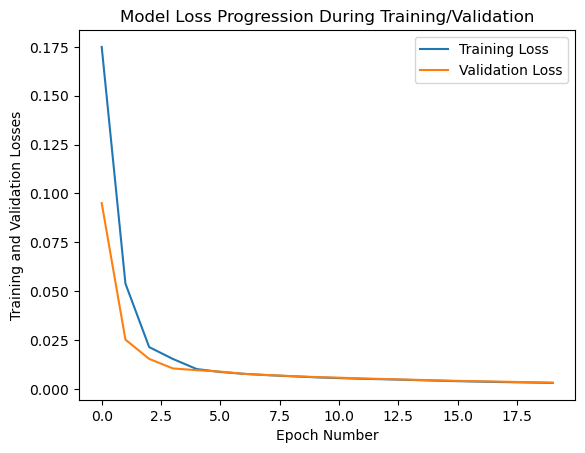

In [23]:
## Visualize our results
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])


## PREDICT THE OUTPUT FOR A NEW SET OF INPUTS

In [28]:
# Gender, Age, Annual Salary, Credit Card Debt, Net Worth
X_Testing = np.array([[1, 50, 50000, 10985, 629312]])

In [27]:
y_predict = model.predict(X_Testing)
# y_predict.shape

1/1 [==============================] - 0s 15ms/step


In [26]:
print('Expected Purchase Amount=', y_predict[:,0])

Expected Purchase Amount= [136804.03]


🥳